In [1]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import sklearn
from sklearn.datasets import fetch_20newsgroups
import pprint 
from pprint import pprint
import sklearn.datasets as datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import os
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
def read_file(filepath):
  try:
    with open(filepath, 'r') as file:
      contents = file.read()
      return contents

  except FileNotFoundError as e:
    print(f"Error: File '{filepath}' not found.")
    return None

In [3]:
def preprocess(text):
        stop_words = set(stopwords.words('english'))
        #lower case fold
        tokens = word_tokenize(text.lower())
        lemmatizer = WordNetLemmatizer()

        # Remove stop words from tokens and lemmatize
        filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
        # Join tokens back into text (optional)
        filtered_text = ' '.join(filtered_tokens)

        pattern = r"[^\w\s]"        
        # Remove punctuation using re
        text = re.sub(pattern, "", filtered_text)
        
        return text

In [4]:
data_path = 'C:\\Users\\momoa\\Downloads\\20news-18828\\20news-18828'
data_folder = os.listdir(data_path) #the folder of all classes

news = []
category = []
for item in data_folder:
  class_folder = os.listdir(data_path + '\\' + f'{item}')
  for filename in class_folder:
        file_path = data_path +'\\'+f'{item}' + '\\' + f'{filename}'
        file = read_file(file_path)
        news.append(preprocess(file))
        category.append(item)

In [5]:
tfidf = TfidfVectorizer()
tfidf.fit(news)
tfidf_features = tfidf.transform(news)

In [6]:
x = tfidf_features
y = category

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Decision tree model Accuracy :  0.6344485749690211


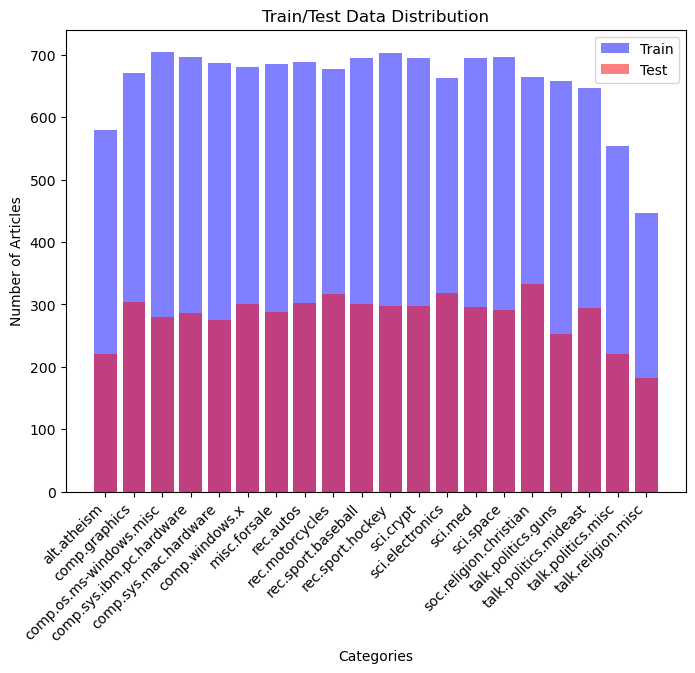

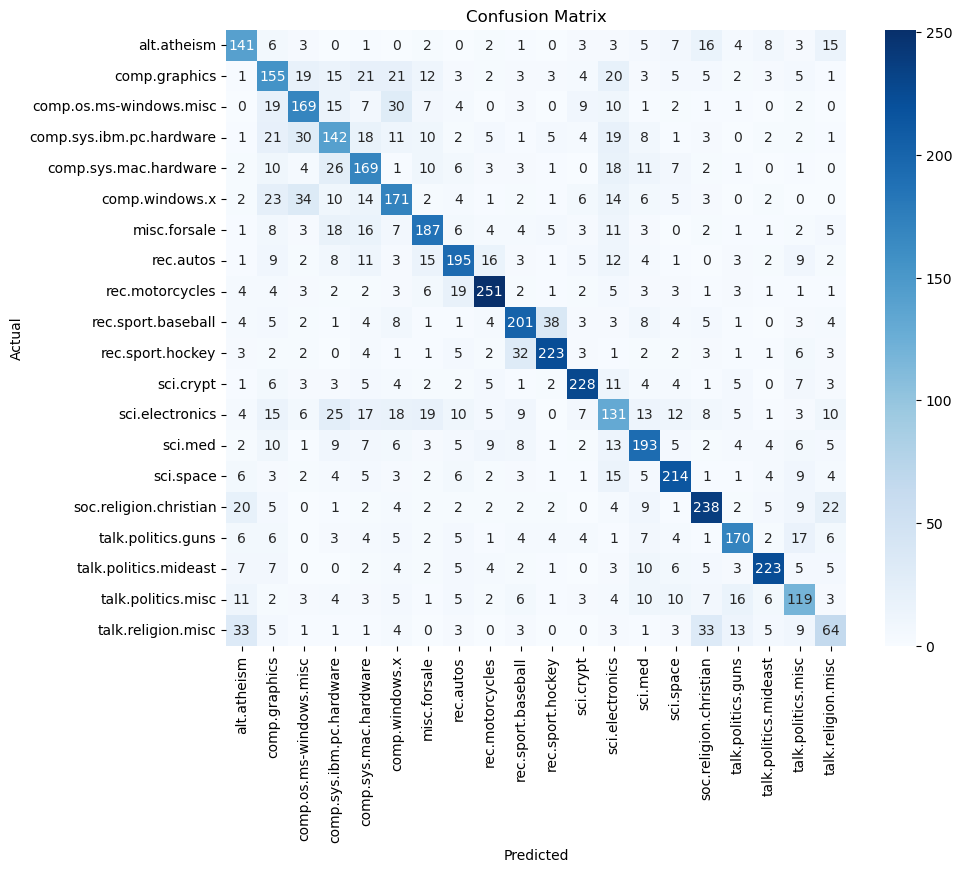

In [8]:
#Decision tree model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train) 

y_pred = tree.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print("Decision tree model Accuracy : ", accuracy)

#Decision tree model visualise
labels = np.unique(y)
plt.figure(figsize=(8, 6))
plt.bar(labels, [list(y_train).count(label) for label in labels], alpha=0.5, color='blue', label='Train')
plt.bar(labels, [list(y_test).count(label) for label in labels], alpha=0.5, color='red', label='Test')
plt.title('Train/Test Data Distribution')
plt.xlabel('Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Naive Bayes model Accuracy :  0.8808638697114534


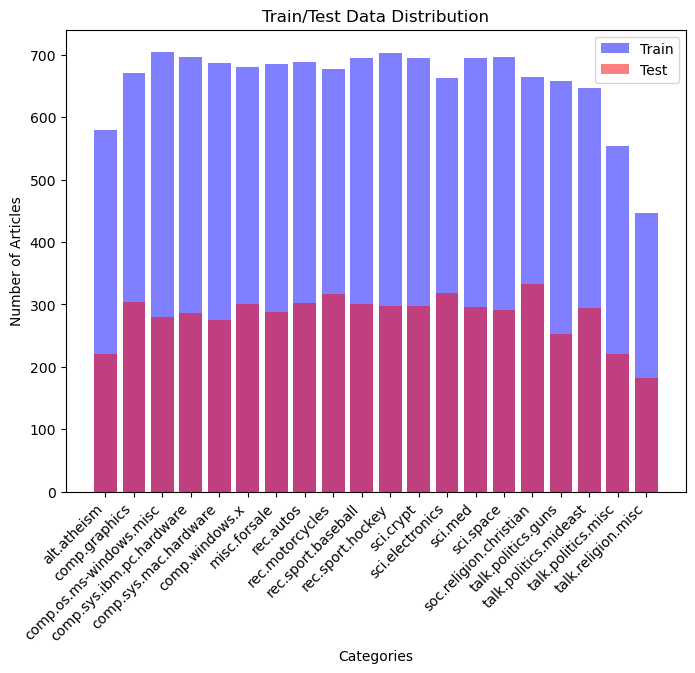

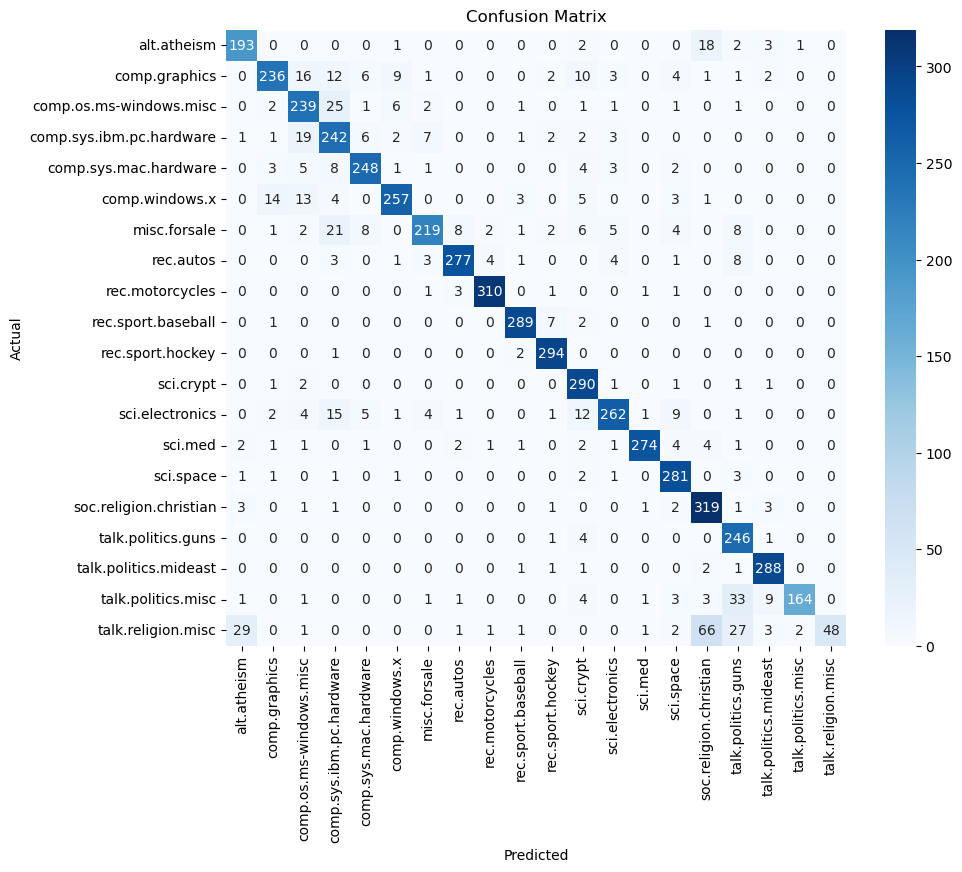

In [9]:
#Naive Bayes model
Naive = MultinomialNB()
Naive.fit(x_train, y_train) 

y_pred = Naive.predict(x_test) 


accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes model Accuracy : ", accuracy)


#Naive Bayes model visualise
labels = np.unique(y)
plt.figure(figsize=(8, 6))
plt.bar(labels, [list(y_train).count(label) for label in labels], alpha=0.5, color='blue', label='Train')
plt.bar(labels, [list(y_test).count(label) for label in labels], alpha=0.5, color='red', label='Test')
plt.title('Train/Test Data Distribution')
plt.xlabel('Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.ylabel('Number of Articles')
plt.legend()
plt.show()



conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVM model Accuracy :  0.9920339883165162


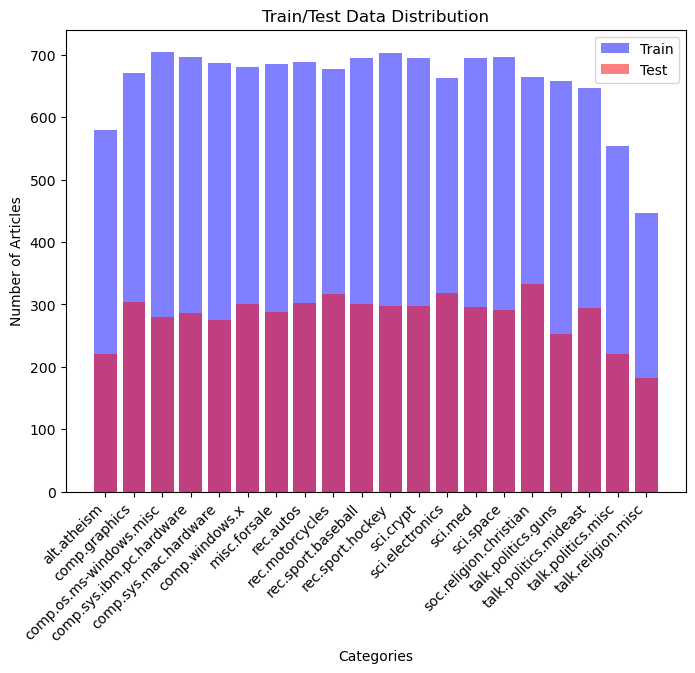

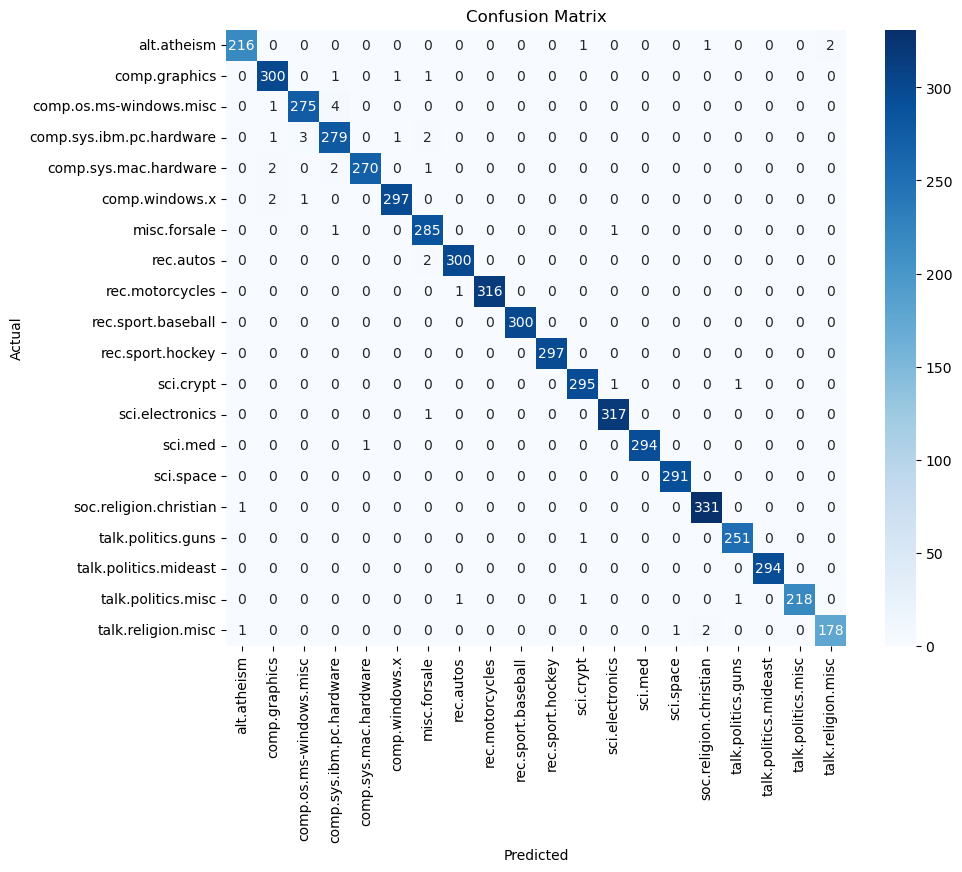

In [10]:
#SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(x, y)  

y_pred = svm.predict(x_test) 
accuracy = accuracy_score(y_test, y_pred)
print("SVM model Accuracy : ", accuracy)

#SVM model visualise
labels = np.unique(y)
plt.figure(figsize=(8, 6))
plt.bar(labels, [list(y_train).count(label) for label in labels], alpha=0.5, color='blue', label='Train')
plt.bar(labels, [list(y_test).count(label) for label in labels], alpha=0.5, color='red', label='Test')
plt.title('Train/Test Data Distribution')
plt.xlabel('Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.ylabel('Number of Articles')
plt.legend()
plt.show()


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNN model Accuracy :  0.9153832536732165


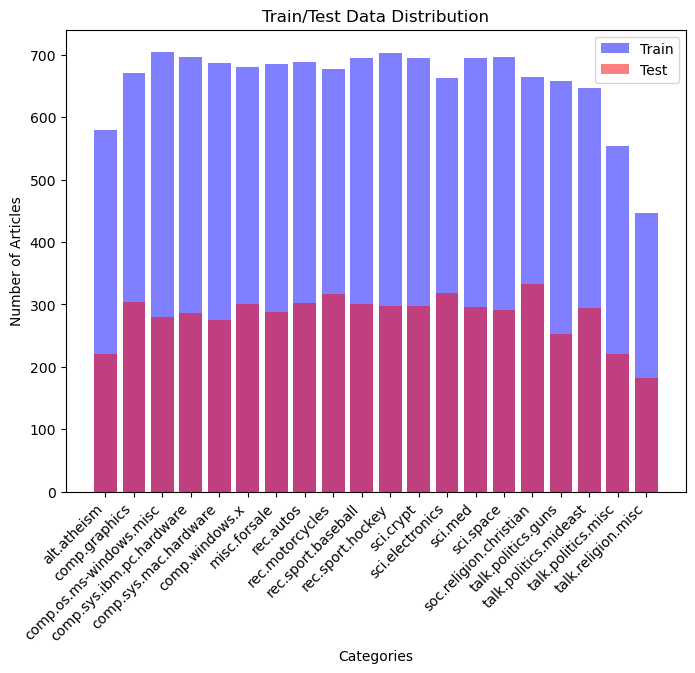

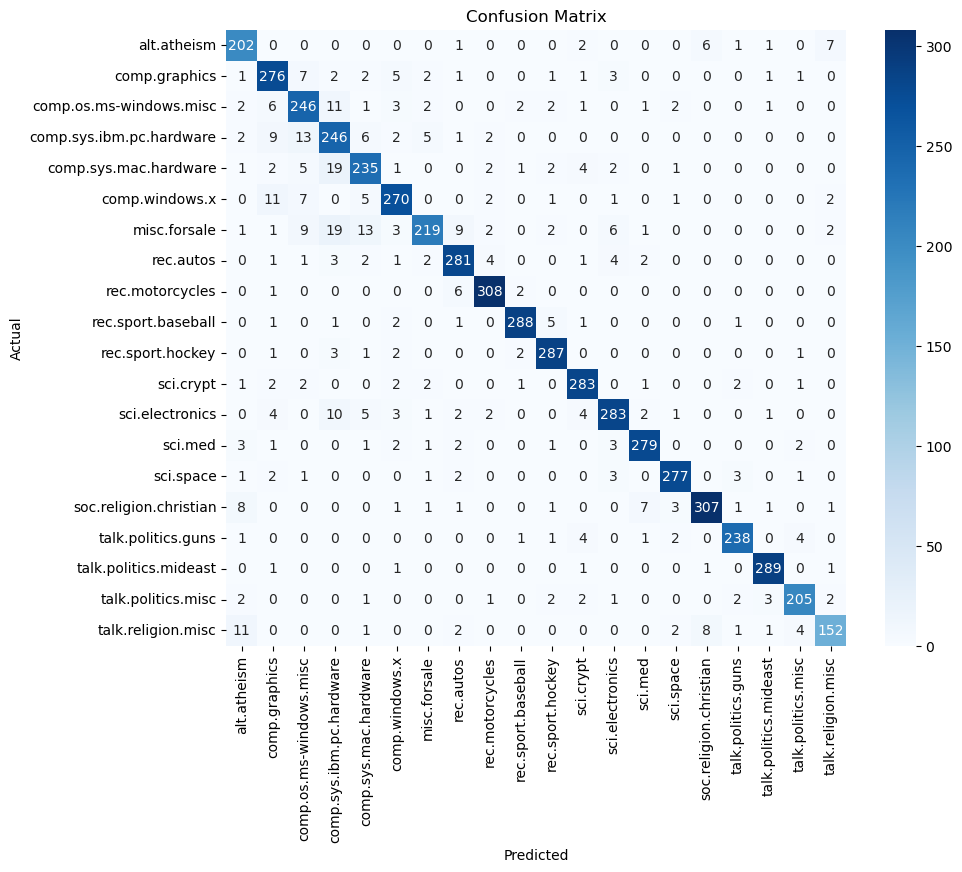

In [11]:
#KNN model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x, y)

y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN model Accuracy : ", accuracy)

#KNN model visualise
labels = np.unique(y)
plt.figure(figsize=(8, 6))
plt.bar(labels, [list(y_train).count(label) for label in labels], alpha=0.5, color='blue', label='Train')
plt.bar(labels, [list(y_test).count(label) for label in labels], alpha=0.5, color='red', label='Test')
plt.title('Train/Test Data Distribution')
plt.xlabel('Categories')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()